In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
capstone = pd.read_csv(r'C:\Users\HP\Downloads\capstone.csv')


In [3]:
clean_cap = capstone

In [4]:
clean_cap

,show_id,Type,title,director,Country,date added,rating,duration,listed_in
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,9/25/2021,PG-13,90 min,Documentaries
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,(9/24/2021),TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,(9/24/2021),TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,9/22/2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sANKOFa,Haile Gerima,Us,9/24/2021,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,YuNUs eMRE,Not Given,Turkey,1/17/2017,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,zAK sTorm,Not Given,United States,9/13/2018,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,ziNdAGi gULZAR haI,Not Given,Pakistan,12/15/2016,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,yOKO,Not Given,Pakistan,6/23/2018,TV-Y,1 Season,Kids' TV


In [5]:
clean_cap.columns

Index(['show_id', 'Type', 'title', 'director', 'Country', 'date added',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [6]:
clean_cap.columns=clean_cap.columns.str.lower().str.replace(' ','_')

In [7]:
nan_counts = clean_cap.isna().sum()

In [8]:
nan_counts

show_id       0
type          0
title         0
director      0
country       0
date_added    0
rating        0
duration      0
listed_in     0
dtype: int64

In [9]:
clean_cap.describe(datetime_is_numeric=True)
clean_cap.describe()


,show_id,type,title,director,country,date_added,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790,8790,8790
unique,8790,12,8787,4528,114,1714,23,250,515
top,s1,Movie,09-Feb,Not Given,United States,01/01/2020,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6110,2,2588,2920,110,3203,1788,362


In [10]:
clean_cap['date_added'] = clean_cap['date_added'].str.replace(r'[() ]', '', regex=True)
print(clean_cap['date_added'])


0        9/25/2021
1        9/24/2021
2        9/24/2021
3        9/22/2021
4        9/24/2021
           ...    
8785     1/17/2017
8786     9/13/2018
8787    12/15/2016
8788     6/23/2018
8789    06/07/2018
Name: date_added, Length: 8790, dtype: object


In [11]:
clean_cap['date_added'] = pd.to_datetime(clean_cap['date_added'])

In [12]:
print(clean_cap.dtypes)

show_id               object
type                  object
title                 object
director              object
country               object
date_added    datetime64[ns]
rating                object
duration              object
listed_in             object
dtype: object


In [13]:
clean_cap['date_added'].value_counts()[:50]

2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
2019-10-01     62
2018-11-01     60
2021-07-01     60
2021-09-01     56
2018-01-01     55
2019-07-01     52
2021-06-02     51
2021-01-01     49
2017-10-01     47
2018-04-01     44
2020-04-01     43
2018-05-01     42
2017-07-01     42
2019-02-01     41
2017-08-01     40
2018-07-01     40
2021-07-06     39
2021-08-01     38
2017-09-01     38
2018-08-01     37
2019-01-01     37
2020-10-01     33
2016-01-01     33
2017-06-01     33
2020-11-01     33
2017-11-01     33
2021-05-01     33
2021-04-01     32
2019-09-01     31
2017-03-31     31
2019-11-20     30
2019-03-01     30
2018-12-01     29
2019-12-15     29
2020-07-05     29
2020-12-01     28
2019-04-01     28
2021-08-27     27
2018-12-31     27
2017-04-01     27
2019-12-01     27
2020-09-01     26
2019-08-01     26
2017-12-01     26
2018-08-02     25
Name: date_added, dtype: int64

In [14]:
clean_cap['month_added'] = clean_cap['date_added'].dt.month
clean_cap['year_added'] = clean_cap['date_added'].dt.year

print(clean_cap[['month_added', 'year_added']])


      month_added  year_added
0               9        2021
1               9        2021
2               9        2021
3               9        2021
4               9        2021
...           ...         ...
8785            1        2017
8786            9        2018
8787           12        2016
8788            6        2018
8789            6        2018

[8790 rows x 2 columns]


In [15]:
#clean_cap['year_added'] = pd.to_datetime(clean_cap['year_added'],)
#clean_cap['month_added'] = pd.to_datetime(clean_cap['month_added'],)
clean_cap['date_added'] = pd.to_datetime(clean_cap['date_added'])

In [16]:
clean_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   show_id      8790 non-null   object        
 1   type         8790 non-null   object        
 2   title        8790 non-null   object        
 3   director     8790 non-null   object        
 4   country      8790 non-null   object        
 5   date_added   8790 non-null   datetime64[ns]
 6   rating       8790 non-null   object        
 7   duration     8790 non-null   object        
 8   listed_in    8790 non-null   object        
 9   month_added  8790 non-null   int64         
 10  year_added   8790 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 755.5+ KB


In [17]:
import pandas as pd
from datetime import datetime

# Calculate the difference in days from the release date to today
today = datetime.today()
clean_cap['days_since_release'] = (today - clean_cap['date_added']).dt.days

# Display the DataFrame with the new 'days_since_release' column
print(clean_cap[['date_added', 'days_since_release']])


     date_added  days_since_release
0    2021-09-25                 753
1    2021-09-24                 754
2    2021-09-24                 754
3    2021-09-22                 756
4    2021-09-24                 754
...         ...                 ...
8785 2017-01-17                2465
8786 2018-09-13                1861
8787 2016-12-15                2498
8788 2018-06-23                1943
8789 2018-06-07                1959

[8790 rows x 2 columns]


In [18]:
clean_cap

,show_id,type,title,director,country,date_added,rating,duration,listed_in,month_added,year_added,days_since_release
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,9,2021,753
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,2021,754
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",9,2021,754
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",9,2021,756
4,s8,Movie,sANKOFa,Haile Gerima,Us,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",9,2021,754
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,YuNUs eMRE,Not Given,Turkey,2017-01-17,TV-PG,2 Seasons,"International TV Shows, TV Dramas",1,2017,2465
8786,s8798,TV Show,zAK sTorm,Not Given,United States,2018-09-13,TV-Y7,3 Seasons,Kids' TV,9,2018,1861
8787,s8801,TV Show,ziNdAGi gULZAR haI,Not Given,Pakistan,2016-12-15,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",12,2016,2498
8788,s8784,TV Show,yOKO,Not Given,Pakistan,2018-06-23,TV-Y,1 Season,Kids' TV,6,2018,1943


In [19]:
clean_cap['title'] = clean_cap['title'].str.lower()  
clean_cap['title'] = clean_cap['title'].str.strip()  
clean_cap['title'] = clean_cap['title'].str.title()  


In [20]:
clean_cap.title

0                   Dick Johnson Is Dead
1                              Ganglands
2                          Midnight Mass
3       Confessions Of An Invisible Girl
4                                Sankofa
                      ...               
8785                          Yunus Emre
8786                           Zak Storm
8787                  Zindagi Gulzar Hai
8788                                Yoko
8789                                 Yom
Name: title, Length: 8790, dtype: object

In [21]:
clean_cap.director

0       Kirsten Johnson
1       Julien Leclercq
2         Mike Flanagan
3         Bruno Garotti
4          Haile Gerima
             ...       
8785          Not Given
8786          Not Given
8787          Not Given
8788          Not Given
8789          Not Given
Name: director, Length: 8790, dtype: object

In [22]:
clean_cap.country.value_counts()[:50]

United States           2920
India                   1047
United Kingdom           604
Pakistan                 419
Not Given                287
Canada                   257
Japan                    256
South Korea              214
France                   213
Spain                    182
Mexico                   137
Egypt                    123
United State             114
united states            113
Turkey                   112
Nigeria                  105
Germany                  104
China                     98
Australia                 91
Brazil                    88
Indonesia                 86
Taiwan                    83
Philippines               83
Hong Kong                 77
Italy                     65
Argentina                 63
Thailand                  43
South Africa              42
Colombia                  42
us                        37
Denmark                   30
Poland                    30
Netherlands               28
Singapore                 28
Ireland       

In [23]:
country_replace = {
   
    "us|US|AUnited Statestria|RUnited Statesia|RUnited Statessia|United States|AUnited Statetria|united states":"United State",
    "uk|UK": "United Kingdom",
    "pk": "Pakistan",
    "itl": "Italy",
    'ID':'Indonesia',
    "AUnited Statetralia":"Australia"
}


for pattern, replacement in country_replace.items():
    clean_cap['country'] = clean_cap['country'].str.replace(pattern, replacement, case=False, regex=True)

In [24]:
clean_cap.country.value_counts()[:50]

United State            3233
India                   1047
United Kingdom           638
Pakistan                 420
Not Given                287
Canada                   257
Japan                    256
South Korea              214
France                   213
Spain                    182
Mexico                   137
Egypt                    123
Australia                114
Turkey                   112
Nigeria                  105
Germany                  104
China                     98
Indonesia                 95
Brazil                    88
Philippines               83
Taiwan                    83
Hong Kong                 77
Italy                     66
Argentina                 63
Thailand                  43
South Africa              42
Colombia                  42
Denmark                   30
Poland                    30
Singapore                 28
Netherlands               28
Ireland                   28
Lebanon                   24
Israel                    22
Malaysia      

In [25]:
clean_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   show_id             8790 non-null   object        
 1   type                8790 non-null   object        
 2   title               8790 non-null   object        
 3   director            8790 non-null   object        
 4   country             8790 non-null   object        
 5   date_added          8790 non-null   datetime64[ns]
 6   rating              8790 non-null   object        
 7   duration            8790 non-null   object        
 8   listed_in           8790 non-null   object        
 9   month_added         8790 non-null   int64         
 10  year_added          8790 non-null   int64         
 11  days_since_release  8790 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 824.2+ KB


In [26]:
#The most popular director
from collections import Counter

directors = clean_cap['director'].tolist()
director_counter = Counter(directors)
most_common_director = director_counter.most_common(1)
print("The most popular director is:", most_common_director[0][0])
print("Number of movies directed by the most popular director:", most_common_director[0][1])


The most popular director is: Not Given
Number of movies directed by the most popular director: 2588


In [27]:
#The countries that make the most and least movies (top5 and bottom5)

top_countries = clean_cap['country'].value_counts().head(5)
bottom_countries = clean_cap['country'].value_counts().tail(5)

print("Top 5 countries making the most movies:")
print(top_countries)

print("\nBottom 5 countries making the least movies:")
print(bottom_countries)


Top 5 countries making the most movies:
United State      3233
India             1047
United Kingdom     638
Pakistan           420
Not Given          287
Name: country, dtype: int64

Bottom 5 countries making the least movies:
Iran            1
West Germany    1
Greece          1
Soviet Union    1
Cameroon        1
Name: country, dtype: int64


In [28]:
movies_data = clean_cap[clean_cap['type'] == 'Movie'].copy()
movies_data['duration'] = movies_data['duration'].str.extract('(\d+)').astype(float)
top_10_countries = movies_data.groupby('country')['duration'].mean().nlargest(10)
print("Top 10 countries with the highest average movie duration:")
print(top_10_countries)

Top 10 countries with the highest average movie duration:
country
Croatia         157.000000
West Germany    150.000000
Soviet Union    147.000000
Cameroon        143.000000
India           125.117098
Iran            123.000000
Romania         121.700000
Somalia         118.000000
nited States    117.000000
Cambodia        114.500000
Name: duration, dtype: float64


In [29]:
movie_trends = clean_cap[clean_cap['type'] == 'Movie']
movies_per_year = movie_trends['year_added'].value_counts().sort_index()

print("Movies released over the years:")
print(movies_per_year)


Movies released over the years:
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     251
2017     835
2018    1233
2019    1422
2020    1282
2021     986
Name: year_added, dtype: int64


In [30]:
popular_country_genre_mix = clean_cap.groupby(['country', 'listed_in'])['show_id'].count().idxmax()

print("The most popular country-genre mix is:")
print(popular_country_genre_mix)


The most popular country-genre mix is:
('United State', 'Documentaries')


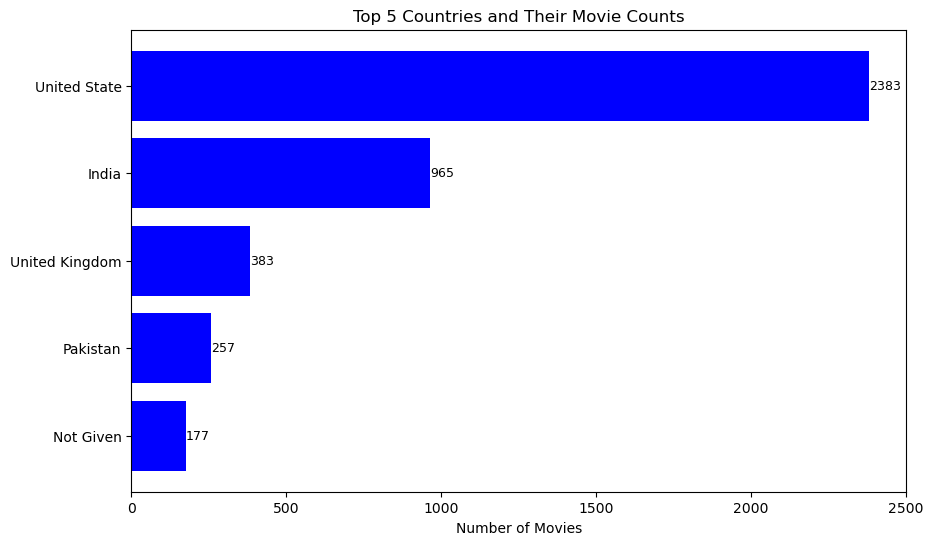

In [31]:
top_countries = clean_cap['country'].value_counts().head(5)

# Calculate movie counts for the top 5 countries
movie_counts_by_country = clean_cap[clean_cap['type'] == 'Movie']['country'].value_counts().head(5)
                                                                                            

plt.figure(figsize=(10, 6))
plt.barh(top_countries.index, movie_counts_by_country, color='blue')
plt.xlabel('Number of Movies')
plt.title('Top 5 Countries and Their Movie Counts')
plt.gca().invert_yaxis()  # Invert the y-axis to display the top countries at the top


for country, movie_count in zip(top_countries.index, movie_counts_by_country):
    plt.annotate(f'{movie_count}', (movie_count, country), fontsize=9, va='center')

plt.show()


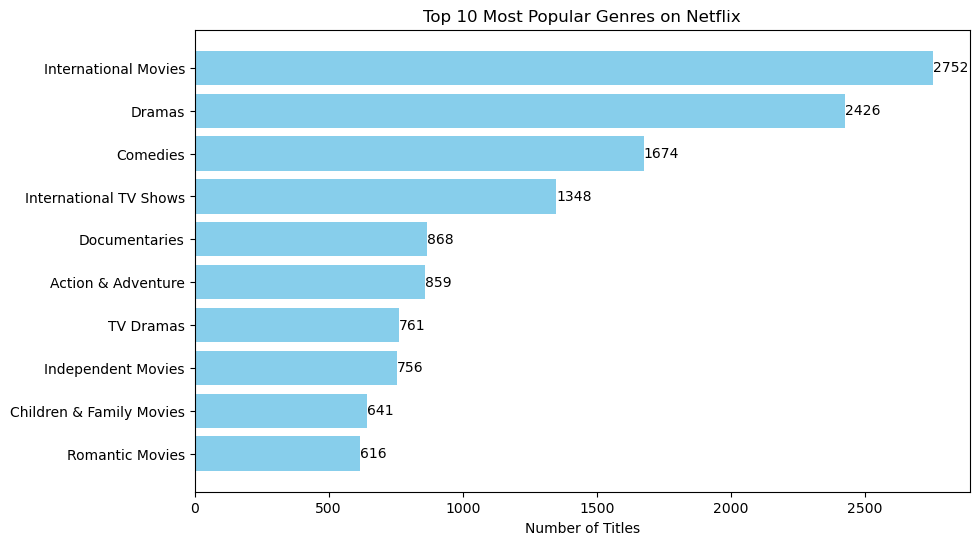

In [64]:

from collections import Counter
genres = clean_cap['listed_in'].str.split(', ')

all_genres = [genre for sublist in genres for genre in sublist]

genre_counts = Counter(all_genres)

top_genres = genre_counts.most_common(10)
top_genre_names = [genre[0] for genre in top_genres]
top_genre_counts = [genre[1] for genre in top_genres]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_genre_names, top_genre_counts, color='skyblue')
plt.xlabel('Number of Titles')
plt.title('Top 10 Most Popular Genres on Netflix')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most popular genre at the top

for i, v in enumerate(top_genre_counts):
    plt.text(v, i, str(v), va='center', fontsize=10, color='black')




In [34]:
#A function for TV duration

def extract_tv_series_duration(clean_cap):
    clean_cap['tv_series_duration'] = None

    for index, row in clean_cap.iterrows():
        duration = row['duration']
        if row['type'] == 'TV Show':
            
            try:
                tv_series_duration = int(duration.split(' ')[0])
                clean_cap.at[index, 'tv_series_duration'] = tv_series_duration
            except (ValueError, AttributeError):
              
             pass
            
            clean_cap.at[index, 'duration'] = None

    return clean_cap

result_clean_cap = extract_tv_series_duration(clean_cap)


In [35]:
#write a function that creates random ratings for each movie in 2s.f

import random

def generate_random_ratings(clean_cap):
    clean_cap['random_rating'] = None

    min_rating = 0
    max_rating = 10
    rating_increment = 2

    for index, row in clean_cap.iterrows():
        if row['type'] == 'Movie':
            random_rating = random.randint(min_rating, max_rating)
            
            random_rating = (random_rating // rating_increment) * rating_increment
            clean_cap.at[index, 'random_rating'] = random_rating

    return clean_cap
clean_cap = generate_random_ratings(clean_cap)


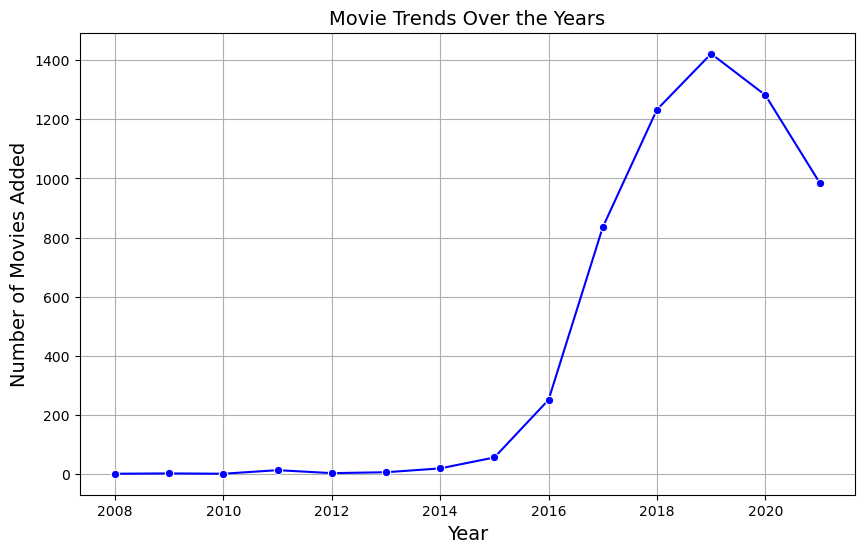

In [40]:

movies_df = clean_cap[clean_cap['type'] == 'Movie']

movie_counts_by_year = movies_df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=movie_counts_by_year.index, y=movie_counts_by_year.values, marker='o', color='b')
plt.xlabel('Year', size='14')
plt.ylabel('Number of Movies Added', size='14')
plt.title('Movie Trends Over the Years', size ='14')
plt.grid(True)
plt.show()


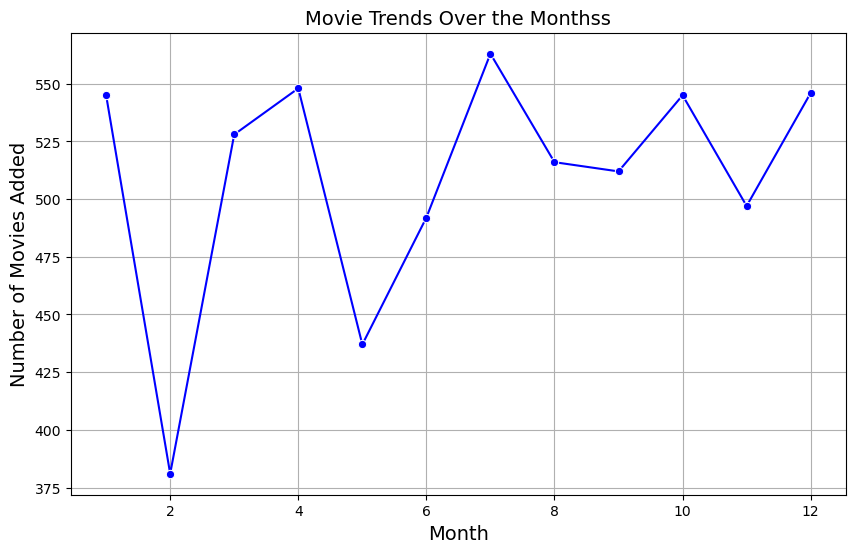

In [42]:

movies_df = clean_cap[clean_cap['type'] == 'Movie']

movie_counts_by_month = movies_df['month_added'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=movie_counts_by_month.index, y=movie_counts_by_month.values, marker='o', color='b')
plt.xlabel('Month', size='14')
plt.ylabel('Number of Movies Added', size='14')
plt.title('Movie Trends Over the Months', size ='14')
plt.grid(True)
plt.show()

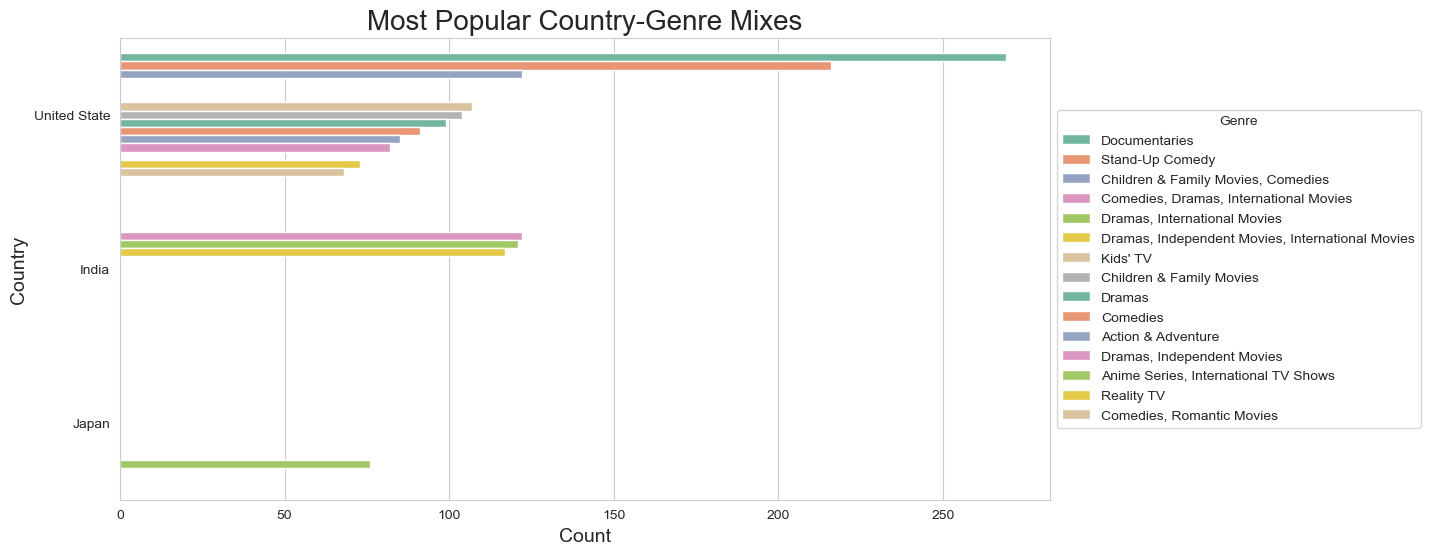

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

popular_mixes = clean_cap.groupby(['country', 'listed_in']).size().reset_index(name='Count')

popular_mixes = popular_mixes.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='country', data=popular_mixes.head(15), hue='listed_in', palette='Set2')
plt.xlabel('Count', size ='14')
plt.ylabel('Country', size='14')
plt.title('Most Popular Country-Genre Mixes', size ='20')
plt.legend(title='Genre', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


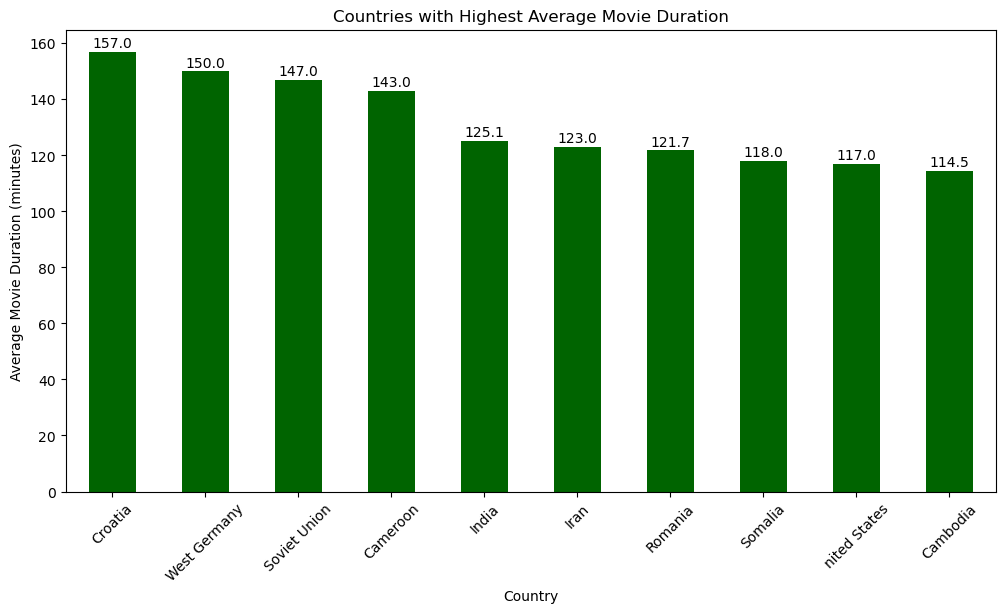

In [71]:
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar',color='darkgreen')
plt.xlabel('Country')
plt.ylabel('Average Movie Duration (minutes)')
plt.title('Countries with Highest Average Movie Duration')
plt.xticks(rotation=45)

for i, v in enumerate(top_countries):
    plt.text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom', fontsize=10)

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_4064\1841232743.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = clean_cap.corr()


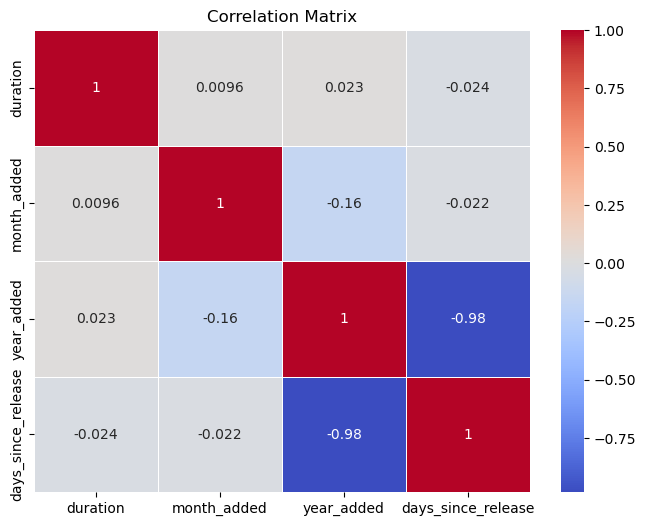

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = clean_cap.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


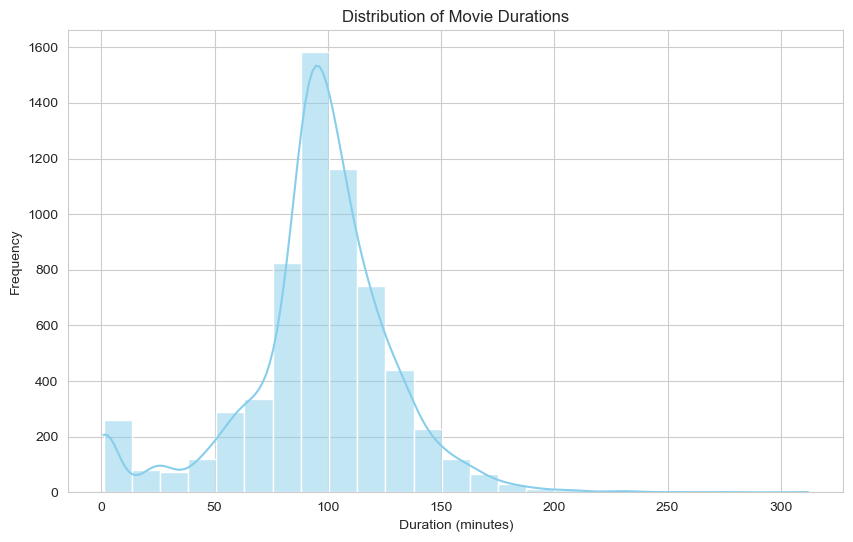

In [75]:
#Distribution of movie duration and duration
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(clean_cap['duration'], bins=25, kde=True, color='skyblue')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Durations')
plt.show()


In [81]:
clean_cap

,show_id,type,title,director,country,date_added,rating,duration,listed_in,month_added,year_added,days_since_release,tv_series_duration,random_rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United State,2021-09-25,PG-13,90.0,Documentaries,9,2021,753,None,6
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",9,2021,754,1,None
2,s6,TV Show,Midnight Mass,Mike Flanagan,United State,2021-09-24,TV-MA,NaN,"TV Dramas, TV Horror, TV Mysteries",9,2021,754,1,None
3,s14,Movie,Confessions Of An Invisible Girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91.0,"Children & Family Movies, Comedies",9,2021,756,None,2
4,s8,Movie,Sankofa,Haile Gerima,United State,2021-09-24,TV-MA,125.0,"Dramas, Independent Movies, International Movies",9,2021,754,None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,TV-PG,NaN,"International TV Shows, TV Dramas",1,2017,2465,2,None
8786,s8798,TV Show,Zak Storm,Not Given,United State,2018-09-13,TV-Y7,NaN,Kids' TV,9,2018,1861,3,None
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,TV-PG,NaN,"International TV Shows, Romantic TV Shows, TV ...",12,2016,2498,1,None
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,TV-Y,NaN,Kids' TV,6,2018,1943,1,None
